In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.utils import shuffle
import string 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbhayat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
fake = pd.read_csv("C:/Users/sbhayat/Desktop/TIDE/Python/Projet/Donnees/fake.csv", sep=',')
true = pd.read_csv("C:/Users/sbhayat/Desktop/TIDE/Python/Projet/Donnees/true.csv", sep=',')

In [3]:
fake.size, true.size

(93924, 85668)

In [4]:
fake['text'][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [5]:
#Concaténation des deux df
fake=fake.assign(fake_news=1)
true=true.assign(fake_news=0)

df=pd.concat([fake,true])

In [6]:
df.size

224490

In [7]:
df.head()
df.tail()

,title,text,subject,date,fake_news
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


fake_news
0    21417
1    23481
Name: text, dtype: int64


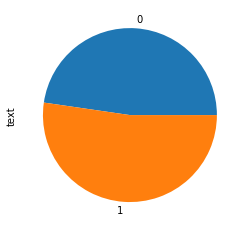

In [12]:
print(df.groupby(['fake_news'])['text'].count())
df.groupby(['fake_news'])['text'].count().plot(kind="pie")
plot.show() ;

In [13]:
#Nb de valeurs manquantes dans le dataframe
df.isnull().sum()

title        0
text         0
subject      0
date         0
fake_news    0
dtype: int64

In [14]:
# des doublons?
duplicateRowsDF = df[df.duplicated()]

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


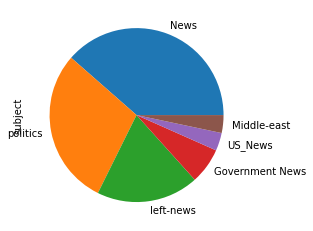

In [19]:
# Thèmes dans les fakes news

print(fake.subject.value_counts())
fake.subject.value_counts().plot(kind='pie') ;

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


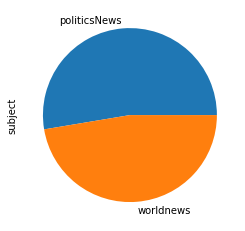

In [20]:
# Thèmes dans les vrais news

print(true.subject.value_counts())
true.subject.value_counts().plot(kind='pie') ;

In [21]:
# dates

df['date'].unique()

array(['December 31, 2017', 'December 30, 2017', 'December 29, 2017', ...,
       'January 15, 2016 ', 'January 14, 2016 ', 'January 13, 2016 '],
      dtype=object)

In [22]:
df['text'] = df['text'].apply(lambda x: x.lower())
df.tail()

,title,text,subject,date,fake_news
21412,'Fully committed' NATO backs new U.S. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,jakarta (reuters) - indonesia will buy 11 sukh...,worldnews,"August 22, 2017",0


In [25]:
df=shuffle(df).reset_index(drop=True)
df.tail()

,title,text,subject,date,fake_news
44893,"Oh, How The Handsome Have Fallen: Gainesville...","remember the hot cops from the gainesville, ...",News,"September 16, 2017",1
44894,RUSH LIMBAUGH FURIOUS Trump Is Allowing “Loser...,the trump administration had proposed $1 billi...,left-news,"Apr 26, 2017",1
44895,Planned Parenthood Worker Rains Holy Hell On ...,planned parenthood workers are sick and tired ...,News,"April 22, 2016",1
44896,"Suicide bombers attack two Afghan mosques, at ...",kabul (reuters) - suicide bombers attacked two...,worldnews,"October 20, 2017",0
44897,"U.N. extends Syria round to Dec. 15, presidenc...",geneva (reuters) - the united nations said on ...,worldnews,"November 30, 2017",0


In [28]:
#On retire les ponctuations ?

#Note : on pourrait pas les utiliser ?

def strip_punctuation(txt):
    for punct in string.punctuation:
        txt = txt.replace(punct, '')
    return txt
df["text"] = df["text"].apply(strip_punctuation)
df.tail()

,title,text,subject,date,fake_news
44893,"Oh, How The Handsome Have Fallen: Gainesville...",remember the hot cops from the gainesville f...,News,"September 16, 2017",1
44894,RUSH LIMBAUGH FURIOUS Trump Is Allowing “Loser...,the trump administration had proposed 1 billio...,left-news,"Apr 26, 2017",1
44895,Planned Parenthood Worker Rains Holy Hell On ...,planned parenthood workers are sick and tired ...,News,"April 22, 2016",1
44896,"Suicide bombers attack two Afghan mosques, at ...",kabul reuters suicide bombers attacked two mo...,worldnews,"October 20, 2017",0
44897,"U.N. extends Syria round to Dec. 15, presidenc...",geneva reuters the united nations said on thu...,worldnews,"November 30, 2017",0


In [32]:
# Exclure les stopwords en anglais 

stop_words=stopwords.words('english')
df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df.tail()

,title,text,subject,date,fake_news
44893,"Oh, How The Handsome Have Fallen: Gainesville...",remember hot cops gainesville florida police d...,News,"September 16, 2017",1
44894,RUSH LIMBAUGH FURIOUS Trump Is Allowing “Loser...,trump administration proposed 1 billion wall s...,left-news,"Apr 26, 2017",1
44895,Planned Parenthood Worker Rains Holy Hell On ...,planned parenthood workers sick tired harassed...,News,"April 22, 2016",1
44896,"Suicide bombers attack two Afghan mosques, at ...",kabul reuters suicide bombers attacked two mos...,worldnews,"October 20, 2017",0
44897,"U.N. extends Syria round to Dec. 15, presidenc...",geneva reuters united nations said thursday ex...,worldnews,"November 30, 2017",0


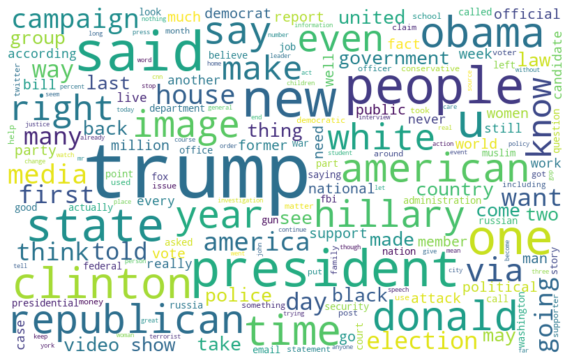

In [31]:
# Nuage de mots pour les fake news

df_fake = df[df["fake_news"] == 1]
collect_words = ' '.join([txt for txt in df_fake.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color="white").generate(collect_words)
plot.figure(figsize=(10,7))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

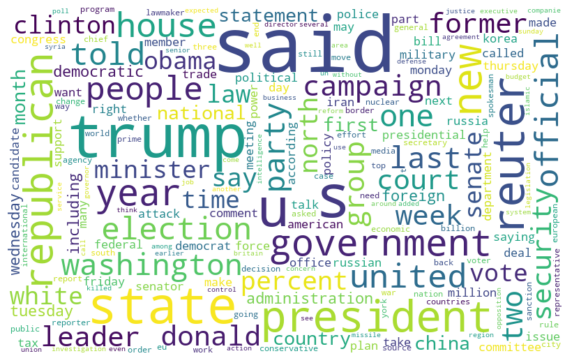

In [33]:
# Nuage de mots pour les true news

df_true = df[df["fake_news"] == 0]
collect_words = ' '.join([txt for txt in df_true.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color="white").generate(collect_words)
plot.figure(figsize=(10,7))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

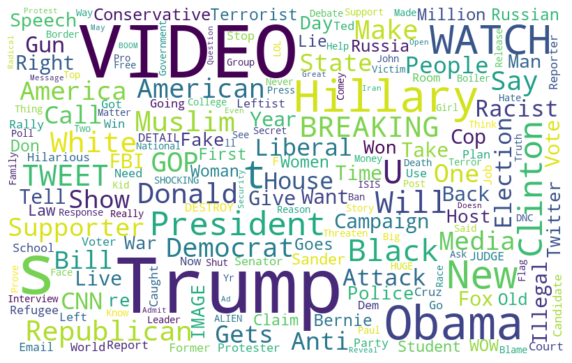

In [34]:
#Peut être plus intéressant sur les titles ?

#Nuage de points sur les titres fake

df_fake_title = df[df["fake_news"] == 1]
collect_words = ' '.join([txt for txt in df_fake.title])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color="white").generate(collect_words)
plot.figure(figsize=(10,7))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

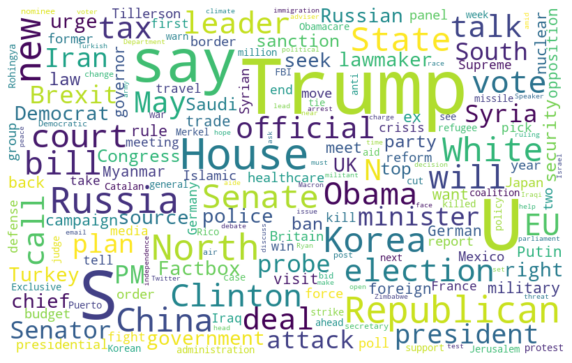

In [35]:
#Nuage de points sur les titres true

df_true_title = df[df["fake_news"] == 0]
collect_words = ' '.join([txt for txt in df_true.title])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color="white").generate(collect_words)
plot.figure(figsize=(10,7))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

In [ ]:
# Plus intéressants de faire le nuage sur les titres j'ai l'impression
# Intéressant aussi de pas enlever les majuscules, on voit direct le côté exclamatif 
# VIDEO, WATCH, lie, Attack, Terrorist : on voit quand même une diff de type de mots qui ressortent